In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
plt.rcParams.update({"font.size": 11, "font.family": "Times New Roman", "mathtext.fontset": "cm"})

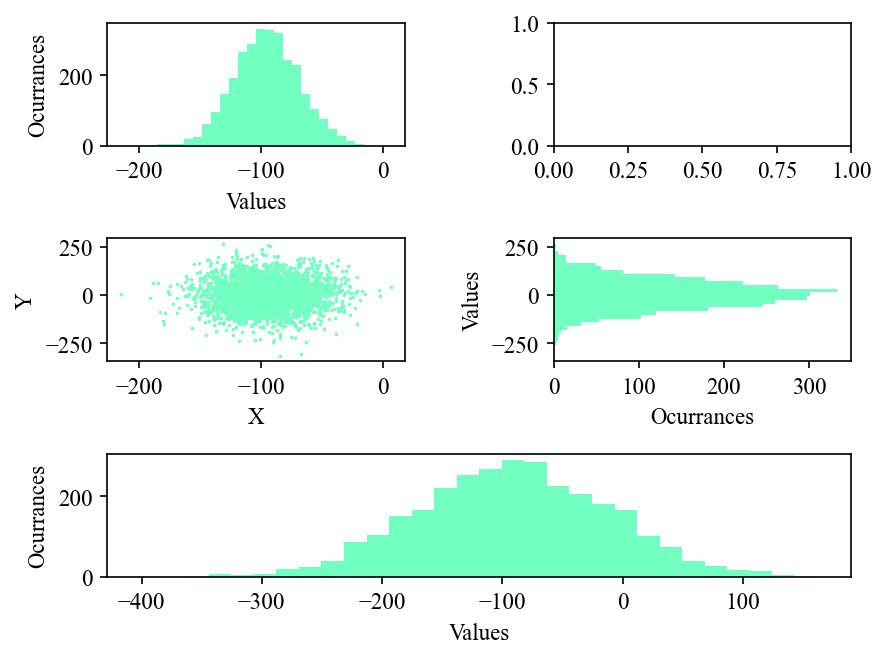

In [25]:
# multiaxis

n = 3000
nbins = 30
mu1, mu2 = np.random.uniform(-100, 100, 2)
sigma1, sigma2 = np.random.uniform(0, 100, 2)

X = np.random.normal(mu1, sigma1, n)
Y = np.random.normal(mu2, sigma2, n)

fig, axs = plt.subplot_mosaic([["X", "blank"], ["scatter", "Y"], ["Z", "Z"]], dpi = 150)
axs["X"].hist(X, bins = nbins, color = "#72ffc2")
axs["Y"].hist(Y, bins = nbins, orientation = "horizontal", color = "#72ffc2")
axs["scatter"].scatter(X, Y, s = 0.5, color = "#72ffc2")
axs["Z"].hist(X + Y, bins = nbins, color = "#72ffc2")

axs["X"].set(xlabel = "Values", ylabel = "Ocurrances")
axs["Y"].set(ylabel = "Values", xlabel = "Ocurrances")
axs["Z"].set(xlabel = "Values", ylabel = "Ocurrances")
axs["scatter"].set(xlabel = "X", ylabel = "Y")

plt.subplots_adjust(wspace = 0.5, hspace = 0.75)

In [11]:
def sample_mean(list):
    return sum(list) / len(list)


def sample_variance(list, sample_mean):
    return sum([(x - sample_mean)**2 for x in list]) / (len(list) - 1)

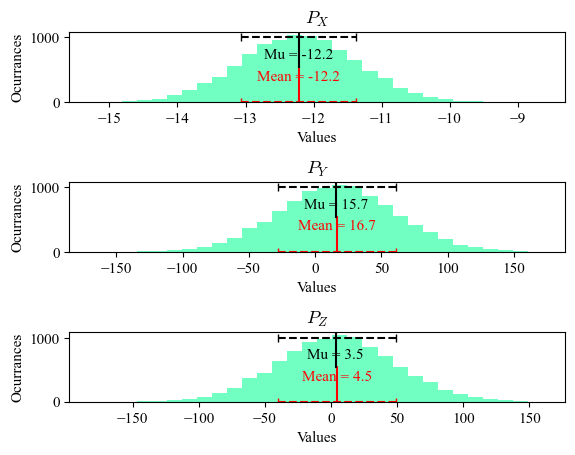

In [26]:
n = 10000
nbins = 30
mu1, mu2 = np.random.uniform(-100, 100, 2)
sigma1, sigma2 = np.random.uniform(0, 100, 2)

X = np.random.normal(mu1, sigma1, n)
Y = np.random.normal(mu2, sigma2, n)

means = [sample_mean(arr) for arr in [X, Y, X + Y]]
vars = [sample_variance(arr, mean) for arr, mean in zip([X, Y, X + Y], means)]

fig, axs = plt.subplot_mosaic([["X"], ["Y"], ["Z"]], dpi = 100)
for label, arr, mean, mu, variance, sigma in zip(["X", "Y", "Z"], [X, Y, X + Y], means, [mu1, mu2, mu1 + mu2], vars, [sigma1, sigma2, np.sqrt(sigma1**2 + sigma2**2)]):
    # Plots
    axs[label].hist(arr, bins = nbins, color = "#72ffc2")

    # Labels
    axs[label].set(xlabel = "Values", ylabel = "Ocurrances", title = f"$P_{label}$")
    
    # Plotting sample means and mu
    axs[label].axvline(mean, ymin = 0, ymax = 0.5, color = "r")
    axs[label].text(mean, n / 30, f"Mean = {round(mean, 1)}", color = "r", ha = "center")
    axs[label].axvline(mu, ymin = 0.5, ymax = 1, color = "black")
    axs[label].text(mu, n / 15, f"Mu = {round(mu, 1)}", color = "black", ha = "center")

    # Plotting sample vars and sigma
    axs[label].plot([mean - np.sqrt(variance), mean + np.sqrt(variance)], [0, 0], "--r|")
    axs[label].plot([mean - sigma, mean + sigma], [n / 10, n / 10], "--k|")
    

plt.subplots_adjust(wspace = 0.5, hspace = 1.15)

In [13]:
def func_rms_mean(isample_array,imean,istdev):
    return istdev / np.sqrt(isample_array)


def func_rms_rms(isample_array,imean,istdev):
    #this is a piecewise function with rms=0 for isample[i]=1
    if isample == 1:
        return 0
    return istdev / np.sqrt(2 * isample_array)

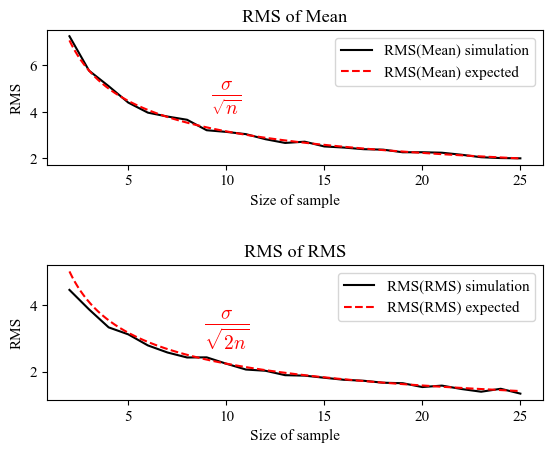

In [33]:
# Simulation for rms of mean and rms of rms
def get_rms_of_mean_rmses(sample_size, mu, sigma):
    num_arr = 1000

    means = np.array([])
    rmses = np.array([])
    # We'll create num_arr arrays and calculate the mean and rms from
    # each array. Obtaining num_arr means and num_arr rmses.
    # From these we calculate the rms of the means and the rms of the rmses.
    for i in range(num_arr):
        X = np.random.normal(mu, sigma, sample_size)
        means = np.append(means, X.mean())
        rmses = np.append(rmses, X.std())
    return means.std(), rmses.std()

mu = 40
sigma = 10
size = 25
sim_mean_rms_arr, sim_rms_rms_arr = np.array([]), np.array([])
for n in range(2, size + 1):
    sim_mean_rms, sim_rms_rms = get_rms_of_mean_rmses(n, mu, sigma)
    sim_mean_rms_arr = np.append(sim_mean_rms_arr, sim_mean_rms)
    sim_rms_rms_arr = np.append(sim_rms_rms_arr, sim_rms_rms)

    # print(f"Simulated rms of mean: {sim_mean_rms}\n"
    #      f"Expected: {sigma / np.sqrt(n)}")
    # print(f"Simulated rms of rms {sim_rms_rms}\n"
    #      f"Expected: {sigma / np.sqrt(2 * n)}\n")

# Plotting simulation results
fig, axs = plt.subplots(2)
axs[0].plot(range(2, size + 1), sim_mean_rms_arr, "k-", label = "RMS(Mean) simulation")
axs[1].plot(range(2, size + 1), sim_rms_rms_arr, "k-", label = "RMS(RMS) simulation")

# Plotting expected behaviour
x = np.linspace(2, size, 1000)
axs[0].plot(x, sigma / np.sqrt(x), "r--", label = "RMS(Mean) expected")
axs[1].plot(x, sigma / np.sqrt(2 * x), "r--", label = "RMS(RMS) expected")

for ax, title in zip(axs, ["RMS of Mean", "RMS of RMS"]):
    ax.set(xlabel = "Size of sample", ylabel = "RMS", title = title)
    ax.legend()

# Some text
axs[0].text(10, 4.5, "$\\frac{\sigma}{\sqrt{n}}$", color = "r", ha = "center", size = 20)
axs[1].text(10, 3.25, "$\\frac{\sigma}{\sqrt{2n}}$", color = "r", ha = "center", size = 20)

plt.subplots_adjust(hspace = 0.75)